In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

import tensorflow as tf

In [2]:
m = 200
x, y = datasets.make_classification(n_samples=m,
                                    n_features=2,
                                    n_informative=2,
                                    n_redundant=0,
                                    n_repeated=0,
                                    n_classes=2,
                                    n_clusters_per_class=1,
                                    random_state=100)
y = y.reshape(-1, 1)
print('x.shape: ', x.shape)
print('y.shape: ', y.shape)

x.shape:  (200, 2)
y.shape:  (200, 1)


In [13]:
x_train.dtype

dtype('float64')

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)
print('x_train.shape: ', x_train.shape, 'y_train.shape: ', y_train.shape)
print('x_test.shape: ', x_test.shape, 'y_test.shape: ', y_test.shape)

x_train.shape:  (150, 2) y_train.shape:  (150, 1)
x_test.shape:  (50, 2) y_test.shape:  (50, 1)


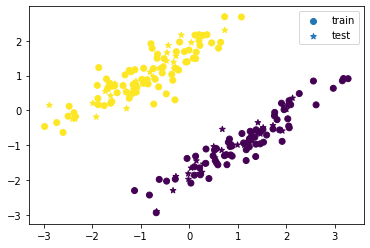

In [8]:
plt.scatter(x_train[:,0], x_train[:,1], c=y_train.reshape(-1), marker='o', label='train');
plt.scatter(x_test[:,0], x_test[:,1], c=y_test.reshape(-1), marker='*', label='test');
plt.legend();

### Hyper-paramters

In [41]:
n_inputs = x_train.shape[1]
m = x_train.shape[0]
n_outputs = 1
lr = 0.01
epochs = 500

### Defining Variables

In [19]:
w = tf.Variable(tf.zeros(shape=(2, 1), dtype=tf.float64), dtype=tf.float64)
b = tf.Variable(0, dtype=tf.float64)
print("w.shape: ",w.shape)
print("b.shape: ",b.shape)

w.shape:  (2, 1)
b.shape:  ()


In [23]:
def model(x):
    z = tf.matmul(x, w) + b 
    y_pred = tf.sigmoid(z)
    return y_pred

In [26]:
y_pred = model(x_train)
y_pred[:5]

<tf.Tensor: id=151, shape=(5, 1), dtype=float64, numpy=
array([[0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5]])>

In [30]:
def loss(y_true, y_pred):
    l = -(y_true * tf.math.log(y_pred) + (1- y_true) *
          tf.math.log(1-y_pred))
    return tf.reduce_mean(l)

In [31]:
loss(y_train, y_pred)

<tf.Tensor: id=177, shape=(), dtype=float64, numpy=0.6931471805599447>

In [43]:
def gradient_descent(x_train, y_train):
    
    with tf.GradientTape(persistent=True) as tape:
        y_pred = model(x_train)
        loss_v = loss(y_train, y_pred)
    dw = tape.gradient(loss_v, w)
    db = tape.gradient(loss_v, b)
    del tape

    w.assign_sub(lr * dw)
    b.assign(b - lr * db)
    return w, b, loss_v

In [46]:
for epoch in range(epochs):
    w, b, loss_v  = gradient_descent(x_train, y_train)
    print('epoch: ', epoch, 'loss: ', loss_v.numpy())

epoch:  0 loss:  0.06654911207110233
epoch:  1 loss:  0.06648759461213342
epoch:  2 loss:  0.06642619361394185
epoch:  3 loss:  0.06636490874773698
epoch:  4 loss:  0.06630373968595504
epoch:  5 loss:  0.06624268610225326
epoch:  6 loss:  0.06618174767150424
epoch:  7 loss:  0.0661209240697906
epoch:  8 loss:  0.06606021497439904
epoch:  9 loss:  0.0659996200638151
epoch:  10 loss:  0.0659391390177174
epoch:  11 loss:  0.06587877151697238
epoch:  12 loss:  0.06581851724362865
epoch:  13 loss:  0.06575837588091166
epoch:  14 loss:  0.06569834711321827
epoch:  15 loss:  0.06563843062611148
epoch:  16 loss:  0.06557862610631494
epoch:  17 loss:  0.06551893324170774
epoch:  18 loss:  0.0654593517213191
epoch:  19 loss:  0.06539988123532312
epoch:  20 loss:  0.06534052147503358
epoch:  21 loss:  0.06528127213289875
epoch:  22 loss:  0.06522213290249614
epoch:  23 loss:  0.06516310347852745
epoch:  24 loss:  0.06510418355681345
epoch:  25 loss:  0.06504537283428888
epoch:  26 loss:  0.064986

epoch:  219 loss:  0.055384494469159454
epoch:  220 loss:  0.05534232463680972
epoch:  221 loss:  0.05530022102930142
epoch:  222 loss:  0.0552581834909327
epoch:  223 loss:  0.05521621186648683
epoch:  224 loss:  0.05517430600123053
epoch:  225 loss:  0.05513246574091188
epoch:  226 loss:  0.05509069093175865
epoch:  227 loss:  0.05504898142047635
epoch:  228 loss:  0.05500733705424641
epoch:  229 loss:  0.0549657576807243
epoch:  230 loss:  0.054924243148037774
epoch:  231 loss:  0.054882793304785064
epoch:  232 loss:  0.05484140800003297
epoch:  233 loss:  0.05480008708331513
epoch:  234 loss:  0.05475883040463022
epoch:  235 loss:  0.05471763781444017
epoch:  236 loss:  0.054676509163668334
epoch:  237 loss:  0.054635444303697864
epoch:  238 loss:  0.05459444308636974
epoch:  239 loss:  0.0545535053639812
epoch:  240 loss:  0.05451263098928396
epoch:  241 loss:  0.05447181981548233
epoch:  242 loss:  0.054431071696231646
epoch:  243 loss:  0.05439038648563657
epoch:  244 loss:  0.0

epoch:  449 loss:  0.047164729008537444
epoch:  450 loss:  0.047134485355802225
epoch:  451 loss:  0.047104281926989455
epoch:  452 loss:  0.047074118641771634
epoch:  453 loss:  0.04704399542003431
epoch:  454 loss:  0.047013912181875415
epoch:  455 loss:  0.04698386884760451
epoch:  456 loss:  0.04695386533774222
epoch:  457 loss:  0.046923901573019365
epoch:  458 loss:  0.04689397747437644
epoch:  459 loss:  0.04686409296296276
epoch:  460 loss:  0.046834247960135925
epoch:  461 loss:  0.04680444238746104
epoch:  462 loss:  0.04677467616671003
epoch:  463 loss:  0.046744949219861054
epoch:  464 loss:  0.046715261469097685
epoch:  465 loss:  0.046685612836808416
epoch:  466 loss:  0.0466560032455858
epoch:  467 loss:  0.04662643261822595
epoch:  468 loss:  0.046596900877727734
epoch:  469 loss:  0.046567407947292215
epoch:  470 loss:  0.04653795375032192
epoch:  471 loss:  0.04650853821042025
epoch:  472 loss:  0.04647916125139076
epoch:  473 loss:  0.04644982279723653
epoch:  474 lo

In [48]:
w1, w2 = w.numpy()

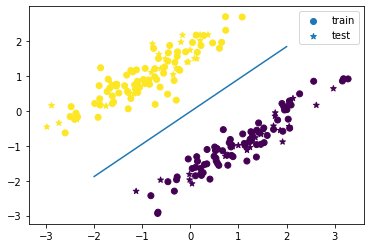

In [49]:
x1 = np.linspace(-2,2,500)
x2 = -w1/w2*x1 - b/w2
plt.figure()
plt.scatter(x_train[:,0], x_train[:,1], c=y_train.reshape(-1), marker='o', label='train');
plt.scatter(x_test[:,0], x_test[:,1], c=y_test.reshape(-1), marker='*', label='test');
plt.legend();
plt.plot(x1, x2);

*:)*